This example illustrates how RGB to HSV (Hue, Saturation, Value) conversion
can be used to facilitate segmentation processes.

In [1]:
using Images, TestImages, LinearAlgebra

rgb_img = testimage("lighthouse")
hsv_img = HSV.(rgb_img)
channels = channelview(float.(hsv_img))
hue_img = channels[1,:,:]
value_img = channels[3,:,:]
saturation_img = channels[2,:,:]

512×768 Array{Float32,2}:
 0.398693   0.406667   0.413333   0.396226   …  0.363636  0.343284  0.340741
 0.398693   0.406452   0.414013   0.406452      0.372414  0.381944  0.364865
 0.396226   0.419355   0.414013   0.414013      0.401316  0.414474  0.406452
 0.411392   0.408805   0.411392   0.414013      0.406667  0.411765  0.413333
 0.41875    0.411043   0.414013   0.411392      0.398693  0.406452  0.414474
 0.419753   0.403727   0.411392   0.411392   …  0.401316  0.403846  0.403846
 0.401235   0.411392   0.408805   0.411392      0.398693  0.406452  0.403846
 0.419753   0.411392   0.419355   0.408805      0.398693  0.406667  0.388535
 0.43125    0.403727   0.385093   0.408805      0.398693  0.381579  0.383117
 0.436709   0.403727   0.39375    0.396341      0.383117  0.381579  0.383117
 ⋮                                           ⋱  ⋮                           
 0.25641    0.238095   0.209302   0.196721      0.279412  0.25      0.262295
 0.25       0.184615   0.139785   0.0962963     0.

A simple segmentation of the image can then be effectively performed
by a mere thresholding of the HSV channels.

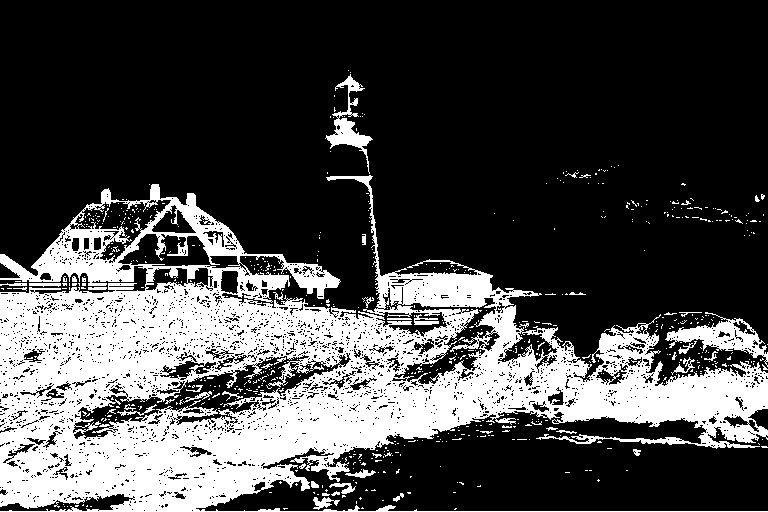

In [2]:
mask = zeros(size(hue_img))
h, s, v = 80, 150, 150
for ind in eachindex(hue_img)
    if hue_img[ind] <= h && saturation_img[ind] <= s/255 && value_img[ind] <= v/255
        mask[ind] = 1
    end
end
binary_img = colorview(Gray, mask)

The obtained binary image can be used as a mask on the
original RGB image.

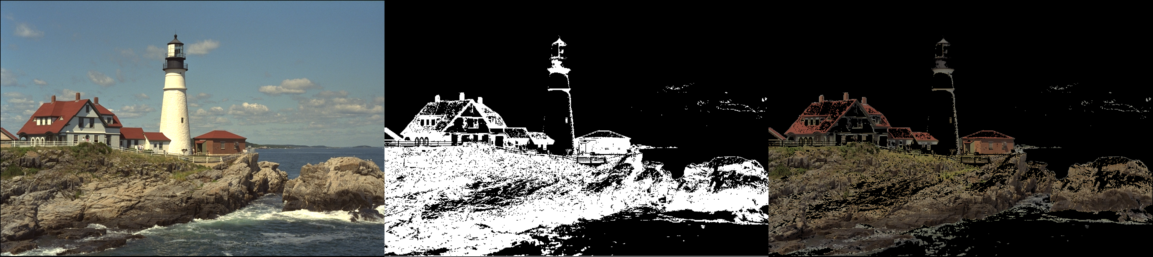

In [3]:
segmented_img = mask .* rgb_img

hcat(rgb_img, binary_img, segmented_img)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*